# Object detection in the "wild"

A good application in quality management is classifying and counting objects.

In [1]:
# Import OpenCV
import cv2
# Since OpenCV is based on numpy:
import numpy as np
# Import pyplot (we will need this to plot with the notebook)
import matplotlib.pyplot as plt
# Helper function to provide plots in true colors in the notebook
def imshow(title, im):
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title(title)

## Aufgabenstellung

Diesmal geht es um Smarties:

![Smarties](Smarties0.png)

1. Findet und zählt die roten Smarties in den Bildern.

    - Dieses Beispiel ist gut in Anlehnung an die Sh2-Tafeln im Beispiel lösbar.

1. Challenge: zählt große und kleine Smarties (habe ich bisher selbst nicht gelöst...).

    - Hier könnte "HoughCircles" helfen.

1. Challenge 2: Zählt, wie viele Smarties jeweils weggenommen werden.

    - Für Veränderungen ist es hilfreich, Bilder zu subtrahieren.

Dokumentiert eure Lösungen wie gewohnt in einem Jupyter Notebook.


We will try to find it due to its strong red colour, let's inspect the three colour channels:

Text(0.5, 1.0, 'Blue - Green')

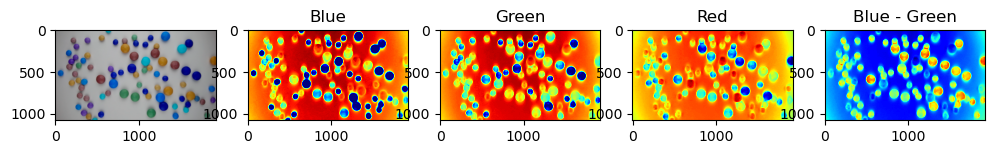

In [228]:
im = cv2.imread('smarties5.png')
plt.figure(figsize = (12,25))
plt.subplot(151)
plt.imshow(im)
plt.subplot(152)
plt.imshow(im[:,:,0], cmap = 'jet')
plt.title('Blue')
plt.subplot(153)
plt.imshow(im[:,:,1], cmap = 'jet')
plt.title('Green')
plt.subplot(154)
plt.imshow(im[:,:,2], cmap = 'jet')
plt.title('Red')
plt.subplot(155)
plt.imshow(255-im[:,:,2] - 0.8*im[:,:,1], cmap = 'jet')
plt.title('Blue - Green')

Apparently, the red isn't as strong as hoped for, especially the brown rust makes it difficult. However, we can remove parts of the brown by observing that green and red channels look almost the same for the rusty patches, so **Red - Green** may be helpful:

In [250]:
plt.imshow(im[:,:,2] - 0.8*im[:,:,1], cmap = 'jet')
plt.colorbar()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

Indeed, the signal values appear to be between 60 and 90 in the subtracted image. 

In [253]:
for i in range(8):
    im = cv2.imread('smarties'+str(i)+'.png')
    gray = (im[:,:,2] - 0.9*im[:,:,1])
    ret,imBW = cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
    # Define Kernel
    kernel = np.ones((7,7),np.uint8)
    # Twice erosion
    imBW = cv2.erode(imBW,kernel,iterations = 3)
    # Twice dilation to restore original size
    imBW = cv2.dilate(imBW,kernel,iterations = 4)  
    imBW = np.uint8(imBW)
    #edges = cv2.Canny(imBW, 100,200)
    contours, hierarchy= cv2.findContours(imBW, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    print('Detected ' + str(len(contours)) + ' smarties')
    j = 0
    for c in contours:
        accuracy= 0.01 * cv2.arcLength(c, True)
        approx= cv2.approxPolyDP(c,accuracy,True)
        cv2.drawContours(im, [approx], 0, (255,0,0),5)
        cv2.putText(im, str(j), 
                (c[:,0][:,0].max()+20, c[:,0][:,1].min()+20), 
                cv2.FONT_HERSHEY_SIMPLEX,  
                   2, (255,0,0), 4, cv2.LINE_AA)
        j = j+1
    
    #plt.figure
    #plt.imshow()
    cv2.imwrite('DetectedSmarties'+str(i)+'.png', im)

Detected 9 smarties
Detected 15 smarties
Detected 14 smarties
Detected 10 smarties
Detected 11 smarties
Detected 11 smarties
Detected 11 smarties
Detected 12 smarties


The signal is visible, however also plenty of rust on the left side. Morphological operations can be used to remove these:

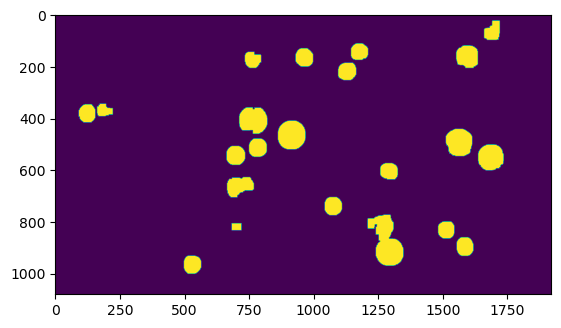

In [51]:
# Define Kernel
kernel = np.ones((7,7),np.uint8)
# Twice erosion
imBW = cv2.erode(imBW,kernel,iterations = 3)
# Twice dilation to restore original size
imBW = cv2.dilate(imBW,kernel,iterations = 4)
# Plot
plt.imshow(imBW)

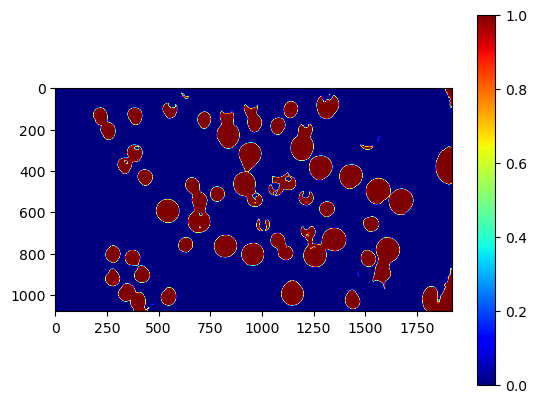

In [249]:
im = cv2.imread('smarties8.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow((255-im)>135, cmap = 'jet')
plt.colorbar()
           